# Instalações

In [1]:
pip install sqlalchemy

In [2]:
pip install pandas===2.0.3

In [3]:
pip install pandasql===0.7.3

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=4c79c8c3b09744737190d70090b4073c34486e273df20cc5172924e444955484
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql




---



# Imports

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql
from pandasql import sqldf
from sqlalchemy import text
from sqlalchemy import sql
from wordcloud import WordCloud



---



# Leitura de CSVs

In [6]:
customers = pd.read_csv('/content/olist_customers_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')



---



#<br><br>

# Tratamento dos Dados

In [7]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

NORTE = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']
NORDESTE = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
CENTROOESTE = ['DF', 'GO', 'MT', 'MS']
SUDESTE = ['ES', 'MG', 'SP', 'RJ']
SUL = ['PR', 'SC', 'RS']

def conversion_reg(n):
	if n in NORTE:
		return 'NORTE'
	elif n in NORDESTE:
		return 'NORDESTE'
	elif n in CENTROOESTE:
		return 'CENTROOESTE'
	elif n in SUDESTE:
		return 'SUDESTE'
	elif n in SUL:
		return 'SUL'
	else:
		return 'ERROR'

sellers['seller_region'] = sellers['seller_state'].apply(conversion_reg)
customers['customer_region'] = customers['customer_state'].apply(conversion_reg)
products['product_category_name'] = products['product_category_name'].fillna('Sem Categoria')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('Sem Comentarios')
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('Sem Titulo de Comentarios')
orders = orders.dropna(subset=['order_approved_at'])
orders = orders.dropna(subset=['order_delivered_carrier_date'])
orders = orders.dropna(subset=['order_delivered_customer_date'])
orders['order_purchase_timestamp_year'] = orders['order_purchase_timestamp'].dt.year
orders['order_purchase_timestamp_month'] = orders['order_purchase_timestamp'].dt.month
orders['order_purchase_timestamp_day'] = orders['order_purchase_timestamp'].dt.day

states_data = []
for state in NORTE:
    states_data.append((state, 'NORTE'))
for state in NORDESTE:
    states_data.append((state, 'NORDESTE'))
for state in CENTROOESTE:
    states_data.append((state, 'CENTROOESTE'))
for state in SUDESTE:
    states_data.append((state, 'SUDESTE'))
for state in SUL:
    states_data.append((state, 'SUL'))

states = pd.DataFrame(states_data, columns=['states_name', 'region'])

states.to_csv('states.csv', index=False)



---



# Observar Possiveis Dados Nulos e Entender os Dados

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
 5   customer_region           99441 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [10]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   order_id                        96461 non-null  object        
 1   customer_id                     96461 non-null  object        
 2   order_status                    96461 non-null  object        
 3   order_purchase_timestamp        96461 non-null  datetime64[ns]
 4   order_approved_at               96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date    96461 non-null  datetime64[ns]
 6   order_delivered_customer_date   96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date   96461 non-null  datetime64[ns]
 8   order_purchase_timestamp_year   96461 non-null  int32         
 9   order_purchase_timestamp_month  96461 non-null  int32         
 10  order_purchase_timestamp_day    96461 non-null  int32         
dtypes: date

In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
 4   seller_region           3095 non-null   object
dtypes: int64(1), object(4)
memory usage: 121.0+ KB




---



# <br><br><br><br>

# 1º Análise: "Expansão Estratégica: A Importância da Região Nordeste para o Crescimento das Vendas"

## Codigo

In [16]:
# Quantidade de Clientes por Estado ordenado por Região

query = '''SELECT cus.customer_state AS "Estados", COUNT(cus.customer_id) AS "Quantidade de Clientes"
           FROM customers AS cus
           GROUP BY cus.customer_state
           ORDER BY cus.customer_region'''

clientes_por_estado = sqldf(query, locals())
clientes_por_estado.head()

,Estados,Quantidade de Clientes
0,DF,2140
1,GO,2020
2,MS,715
3,MT,907
4,AL,413


In [17]:
# Quantidade de Pedidos por Estado ordenado por Região

query = '''SELECT cus.customer_state AS "Estados", COUNT(ord.order_id) AS "Quantidade de Pedidos"
           FROM orders AS ord
           INNER JOIN customers AS cus ON ord.customer_id = cus.customer_id
           GROUP BY cus.customer_state, cus.customer_region
           ORDER BY cus.customer_region;'''

pedidos_por_estado = sqldf(query, locals())
pedidos_por_estado.head()

,Estados,Quantidade de Pedidos
0,DF,2080
1,GO,1957
2,MS,701
3,MT,886
4,AL,397


In [18]:
# Quantidade de Produtos Pedidos por Estado ordenado por Região

query = '''SELECT customers.customer_state AS "Estados", COUNT(order_items.product_id) AS "Quantidade de Produtos"
           FROM orders
           INNER JOIN customers ON orders.customer_id = customers.customer_id
           INNER JOIN order_items ON orders.order_id = order_items.order_id
           GROUP BY customers.customer_state, customers.customer_region
           ORDER BY customers.customer_region;'''

produtos_por_estado = sqldf(query, locals())
produtos_por_estado.head()

,Estados,Quantidade de Produtos
0,DF,2355
1,GO,2277
2,MS,811
3,MT,1037
4,AL,427


In [19]:
# Quantidade de Vendedores por Estado ordenado por Região

query = '''SELECT states.states_name AS "Estados", IFNULL(COUNT(sellers.seller_id), 0) AS "Quantidade de Vendedores"
           FROM states
           LEFT JOIN sellers ON states.states_name = sellers.seller_state
           GROUP BY "Estados"
           ORDER BY states.region;'''

vendedores_por_estado = sqldf(query, locals())
vendedores_por_estado.head()

,Estados,Quantidade de Vendedores
0,DF,30
1,GO,40
2,MS,5
3,MT,4
4,AL,0


In [20]:
# Quantidade de Clientes no Norte, Nordeste e Centro Oeste ordenado por Região

query = '''SELECT customer_state AS 'Estados', COUNT(customer_id) AS "Quantidade de Clientes"
           FROM customers
           WHERE customer_region != "SUL"
           AND customer_region != "SUDESTE"
           GROUP BY customer_state
           ORDER BY customer_region'''

clientes_norte_nordeste_centro = sqldf(query, locals())
clientes_norte_nordeste_centro

,Estados,Quantidade de Clientes
0,DF,2140
1,GO,2020
2,MS,715
3,MT,907
4,AL,413
5,BA,3380
6,CE,1336
7,MA,747
8,PB,536
9,PE,1652


In [21]:
# Quantidade de Pedidos no Norte, Nordeste e Centro Oeste ordenado por Região

query = '''SELECT cus.customer_state AS "Estados", COUNT(ord.order_id) AS "Quantidade de Pedidos"
            FROM orders AS ord
            INNER JOIN customers AS cus ON ord.customer_id = cus.customer_id
            WHERE customer_region != "SUL"
            AND customer_region != "SUDESTE"
            GROUP BY "Estados", cus.customer_region
            ORDER BY cus.customer_region;'''

pedidos_norte_nordeste_centro = sqldf(query, locals())
pedidos_norte_nordeste_centro

,Estados,Quantidade de Pedidos
0,DF,2080
1,GO,1957
2,MS,701
3,MT,886
4,AL,397
5,BA,3256
6,CE,1278
7,MA,716
8,PB,517
9,PE,1593


In [22]:
# Quantidade de Produtos Pedidos no Norte, Nordeste e Centro Oeste ordenado por Região

query = '''SELECT customers.customer_state AS "Estados", COUNT(order_items.product_id) AS "Quantidade de Produtos"
           FROM orders
           INNER JOIN customers ON orders.customer_id = customers.customer_id
           INNER JOIN order_items ON orders.order_id = order_items.order_id
           WHERE customer_region != "SUL"
           AND customer_region != "SUDESTE"
           GROUP BY "Estados", customers.customer_region
           ORDER BY customers.customer_region;'''

produtos_norte_nordeste_centro = sqldf(query, locals())
produtos_norte_nordeste_centro

,Estados,Quantidade de Produtos
0,DF,2355
1,GO,2277
2,MS,811
3,MT,1037
4,AL,427
5,BA,3683
6,CE,1425
7,MA,799
8,PB,586
9,PE,1746


In [23]:
# Quantidade de Vendedores no Norte, Nordeste e Centro Oeste ordenado por Região

query = '''SELECT states.states_name AS "Estados", IFNULL(COUNT(sellers.seller_id), 0) AS "Quantidade de Vendedores"
            FROM states
            LEFT JOIN sellers ON states.states_name = sellers.seller_state
            WHERE states.region != "SUL"
            AND states.region != "SUDESTE"
            GROUP BY "Estados"
            ORDER BY states.region;'''

vendedores_norte_nordeste_centro = sqldf(query, locals())
vendedores_norte_nordeste_centro

,Estados,Quantidade de Vendedores
0,DF,30
1,GO,40
2,MS,5
3,MT,4
4,AL,0
5,BA,19
6,CE,13
7,MA,1
8,PB,6
9,PE,9


In [24]:
# Medias Utilizadas

media_vendedores_por_estado = vendedores_por_estado["Quantidade de Vendedores"].mean()
media_clientes_por_estado = clientes_por_estado["Quantidade de Clientes"].mean()
media_pedidos_por_estado = pedidos_por_estado["Quantidade de Pedidos"].mean()
media_produtos_por_estado = produtos_por_estado["Quantidade de Produtos"].mean()
media_clientes_norte_nordeste_centro = clientes_norte_nordeste_centro["Quantidade de Clientes"].mean()
media_pedidos_norte_nordeste_centro = pedidos_norte_nordeste_centro["Quantidade de Pedidos"].mean()
media_produtos_norte_nordeste_centro = produtos_norte_nordeste_centro["Quantidade de Produtos"].mean()



---



## Gráfico: Quantidade de Vendedores por Estado/Região

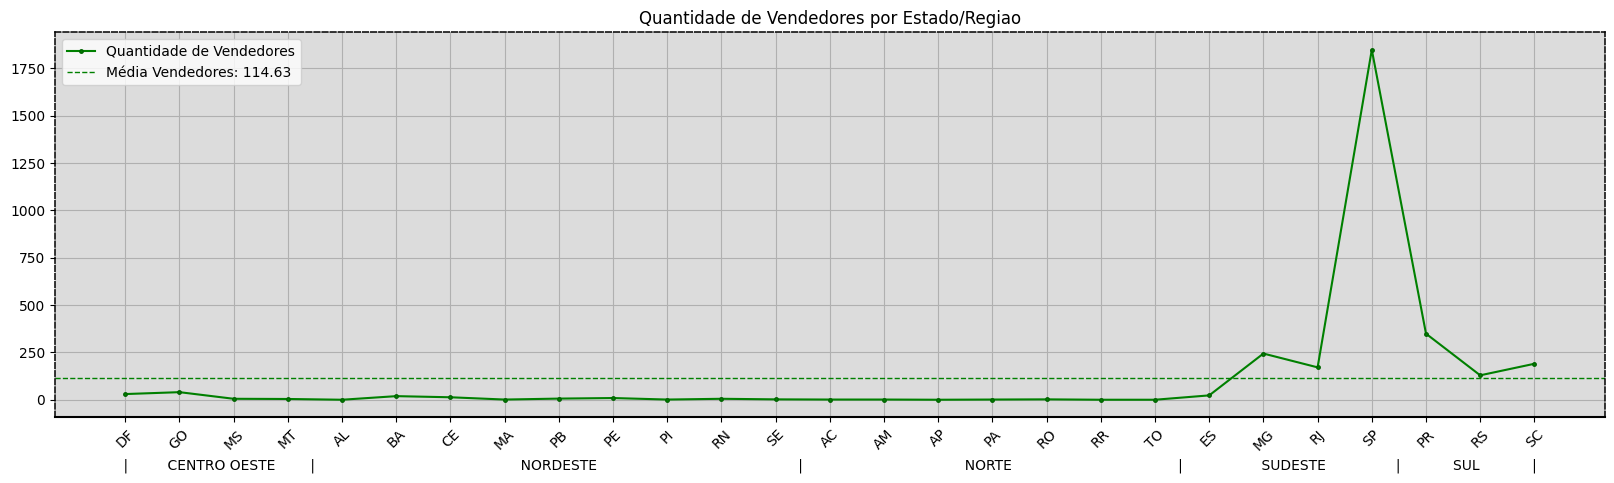

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))

vendedores_por_estado.plot.line(ax=ax, label='Quantidade de Vendedores', linewidth=1.5, color = 'green', marker='.', markersize=5, markeredgecolor='darkgreen', markerfacecolor='green')

ax.set_xticks(range(0, len(vendedores_por_estado.index)))
ax.set_xticklabels(vendedores_por_estado["Estados"], rotation=45)
ax.axhline(y=media_vendedores_por_estado, color='green', linestyle='--', linewidth=1, label=f'Média Vendedores: {media_vendedores_por_estado:.2f}')

ax.set_xlabel('    |         CENTRO OESTE        |                                               NORDESTE                                              |                                     NORTE                                      |                  SUDESTE                |            SUL            |    ')
ax.set_ylabel('')

plt.title('Quantidade de Vendedores por Estado/Regiao')
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.grid()
ax.legend()

plt.show()

### Extraindo do Gráfico
- A concentração significativa de vendedores em São Paulo é notável, com uma distribuição notavelmente menor em suas áreas circundantes. Por outro lado, outras regiões do Brasil apresentam uma presença muito limitada de vendedores, com exceção das mesmas regiões, Sudeste e Sul. Precisamos entender o impacto dessas estatísticas.



---



## Gráfico: Quantidade de Clientes, Pedidos, Produtos e Vendedores por Estado/Região

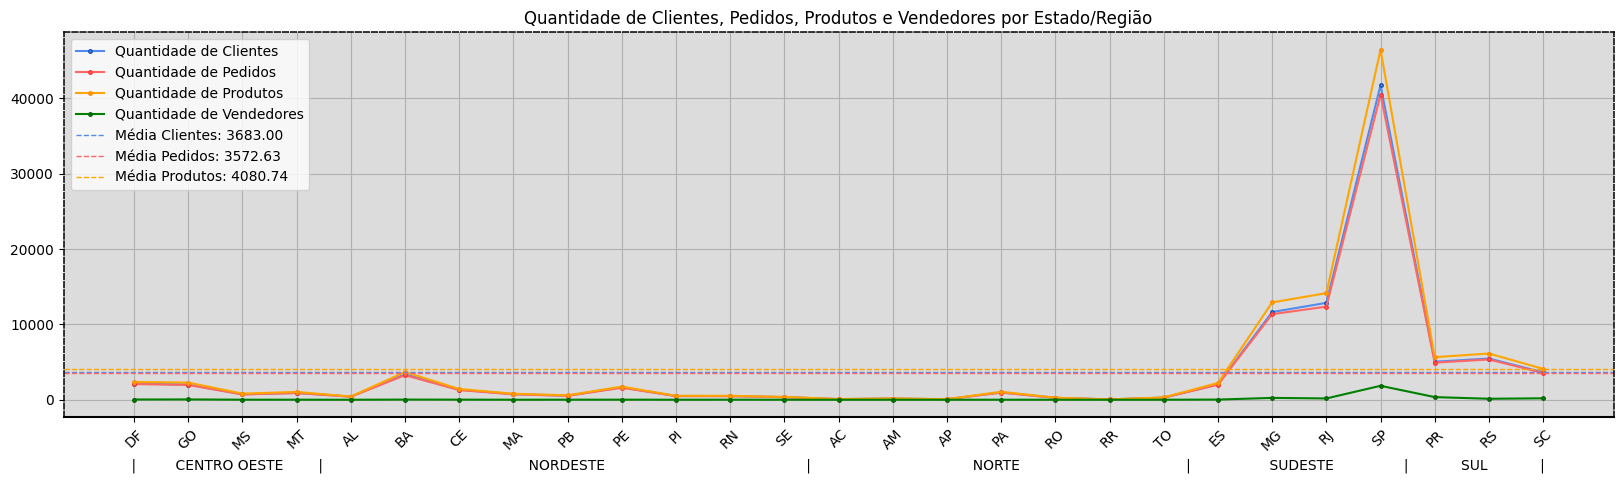

In [26]:
fig, ax = plt.subplots(figsize=(20, 5))

clientes_por_estado.plot.line(ax=ax, label='Quantidade de Clientes', linewidth=1.5, color = '#538bec', marker='.', markersize=5, markeredgecolor='#1451b8', markerfacecolor='#538bec')
pedidos_por_estado.plot.line(ax=ax, label='Quantidade de Pedidos', linewidth=1.5, color = '#FF6666', marker='.', markersize=5, markeredgecolor='#ff3232', markerfacecolor='#FF6666')
produtos_por_estado.plot.line(ax=ax, label='Quantidade de Produtos', linewidth=1.5, color = 'orange', marker='.', markersize=5, markeredgecolor='darkorange', markerfacecolor='orange')
vendedores_por_estado.plot.line(ax=ax, label='Quantidade de Vendedores', linewidth=1.5, color = 'green', marker='.', markersize=5, markeredgecolor='darkgreen', markerfacecolor='green')

ax.set_xticks(range(0, len(clientes_por_estado.index)))
ax.set_xticklabels(clientes_por_estado['Estados'], rotation=45)

ax.axhline(y=media_clientes_por_estado, color='#538bec', linestyle='--', linewidth=1, label=f'Média Clientes: {media_clientes_por_estado:.2f}')
ax.axhline(y=media_pedidos_por_estado, color='#FF6666', linestyle='--', linewidth=1, label=f'Média Pedidos: {media_pedidos_por_estado:.2f}')
ax.axhline(y=media_produtos_por_estado, color='orange', linestyle='--', linewidth=1, label=f'Média Produtos: {media_produtos_por_estado:.2f}')

ax.set_xlabel('    |         CENTRO OESTE        |                                               NORDESTE                                              |                                     NORTE                                      |                  SUDESTE                |            SUL            |    ')
ax.set_ylabel('')

plt.title('Quantidade de Clientes, Pedidos, Produtos e Vendedores por Estado/Região')
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.grid()
ax.legend()

plt.show()

### Extraindo do Gráfico
- Do gráfico, observamos que a presença significativa de vendedores em São Paulo influencia diretamente a quantidade de clientes, pedidos e produtos solicitados. Regiões próximas, principalmente dentro do Sul e Sudeste, mostram estatísticas positivas em comparação com outras regiões do país, onde há uma presença limitada desses fatores. No entanto, vale ressaltar que alguns estados apresentam pequenos picos de vendas, sugerindo um potencial de crescimento em áreas menos exploradas. Assim, evidenciando o impacto substancial da quantidade de vendedores. No entanto, persiste uma dificuldade na análise dos dados dos vendedores em comparação com os outros dados.




---



## Gráfico: Quantidade de Estatísticas por Estado/Região Normalizados

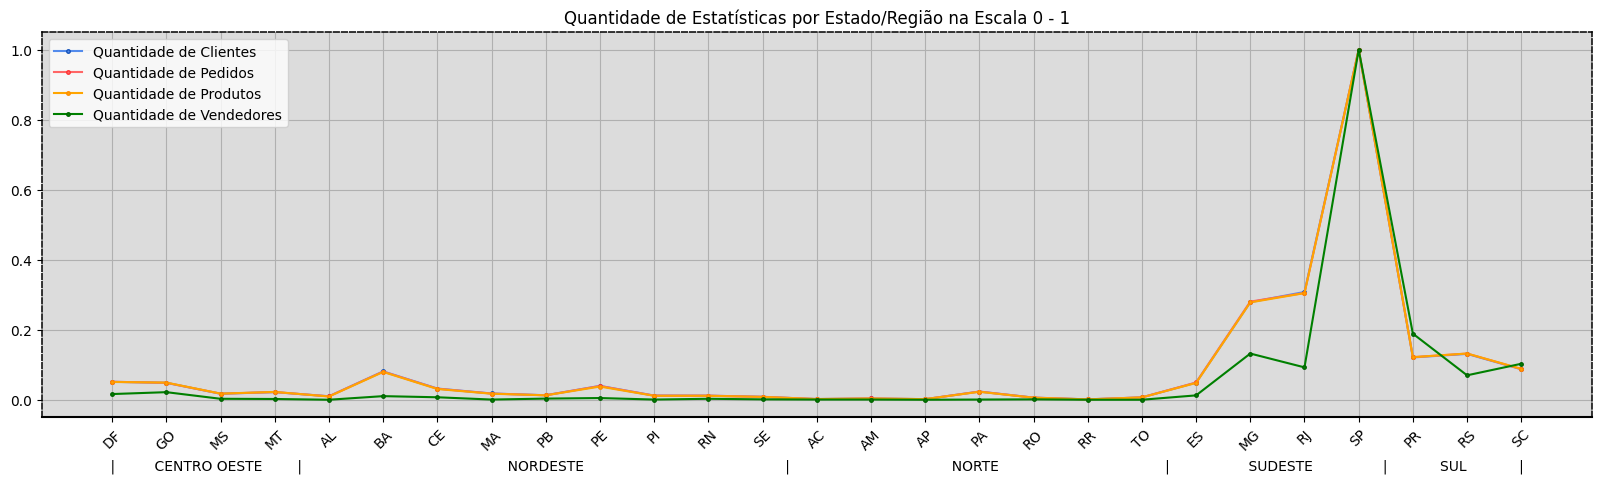

In [27]:
max_clientes_por_estado = clientes_por_estado['Quantidade de Clientes'].max()
max_pedidos_por_estado = pedidos_por_estado['Quantidade de Pedidos'].max()
max_produtos_por_estado = produtos_por_estado['Quantidade de Produtos'].max()
max_vendedores_por_estado = vendedores_por_estado['Quantidade de Vendedores'].max()

clientes_por_estado_normalized = clientes_por_estado['Quantidade de Clientes'] / max_clientes_por_estado
pedidos_por_estado_normalized = pedidos_por_estado['Quantidade de Pedidos'] / max_pedidos_por_estado
produtos_por_estado_normalized = produtos_por_estado['Quantidade de Produtos'] / max_produtos_por_estado
vendedores_por_estado_normalized = vendedores_por_estado['Quantidade de Vendedores'] / max_vendedores_por_estado

fig, ax = plt.subplots(figsize=(20, 5))

clientes_por_estado_normalized.plot.line(ax=ax, label='Quantidade de Clientes', linewidth=1.5, color = '#538bec', marker='.', markersize=5, markeredgecolor='#1451b8', markerfacecolor='#538bec')
pedidos_por_estado_normalized.plot.line(ax=ax, label='Quantidade de Pedidos', linewidth=1.5, color = '#FF6666', marker='.', markersize=5, markeredgecolor='#ff3232', markerfacecolor='#FF6666')
produtos_por_estado_normalized.plot.line(ax=ax, label='Quantidade de Produtos', linewidth=1.5, color = 'orange', marker='.', markersize=5, markeredgecolor='darkorange', markerfacecolor='orange')
vendedores_por_estado_normalized.plot.line(ax=ax, label='Quantidade de Vendedores', linewidth=1.5, color = 'green', marker='.', markersize=5, markeredgecolor='darkgreen', markerfacecolor='green')

ax.set_xticks(range(0, len(clientes_por_estado.index)))
ax.set_xticklabels(clientes_por_estado['Estados'], rotation=45)

ax.set_xlabel('    |         CENTRO OESTE        |                                               NORDESTE                                              |                                     NORTE                                      |                  SUDESTE                |            SUL            |    ')
ax.set_ylabel('')

plt.title('Quantidade de Estatísticas por Estado/Região na Escala 0 - 1')
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.grid()
ax.legend()

plt.show()

### Extraindo do Gráfico
- A presença significativa de vendedores em São Paulo já se tornou um fato incontestável, influenciando diretamente a quantidade de clientes, pedidos e produtos solicitados. Contudo, merece destaque o surgimento de pequenos picos de vendas em alguns estados, indicando um potencial de crescimento em regiões menos exploradas. Isso evidencia o impacto substancial da quantidade de vendedores. No entanto, persiste uma dificuldade na análise dos dados dos vendedores em comparação com outros aspectos.



---



## Gráfico: Quantidade de Estatísticas no Norte, Nordeste e Centro Oeste por Estado

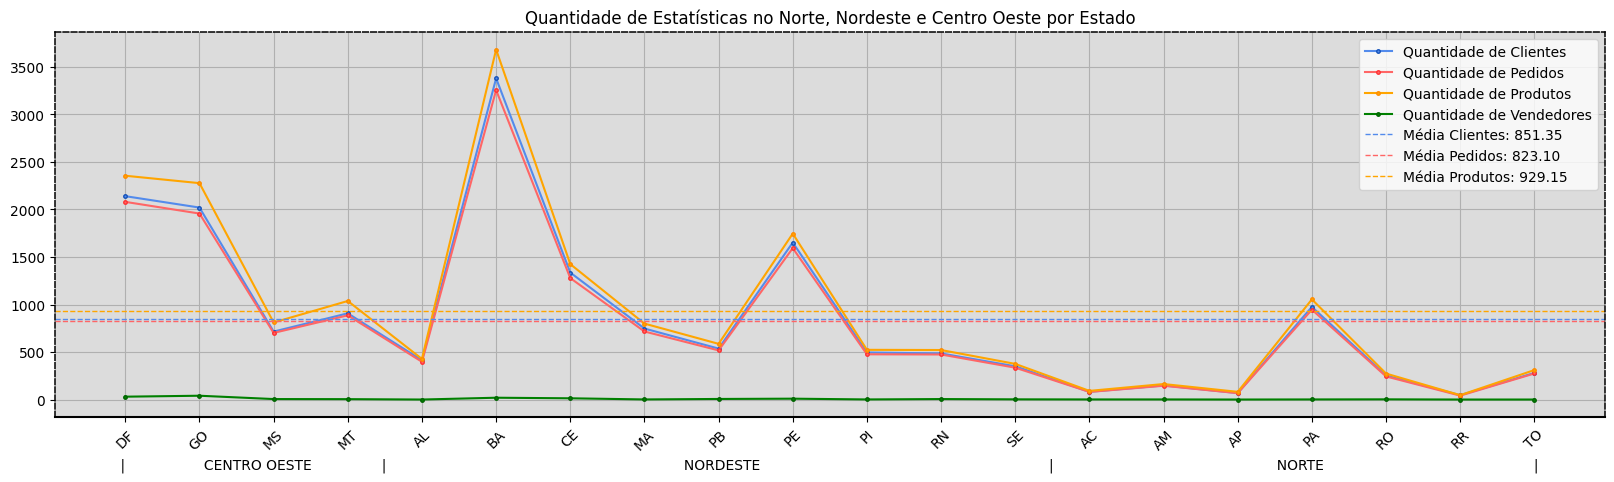

In [28]:
fig, ax = plt.subplots(figsize=(20, 5))

clientes_norte_nordeste_centro.plot.line(ax=ax, label='Quantidade de Clientes', linewidth=1.5, color = '#538bec', marker='.', markersize=5, markeredgecolor='#1451b8', markerfacecolor='#538bec')
pedidos_norte_nordeste_centro.plot.line(ax=ax, label='Quantidade de Pedidos', linewidth=1.5, color = '#FF6666', marker='.', markersize=5, markeredgecolor='#ff3232', markerfacecolor='#FF6666')
produtos_norte_nordeste_centro.plot.line(ax=ax, label='Quantidade de Produtos', linewidth=1.5, color = 'orange', marker='.', markersize=5, markeredgecolor='darkorange', markerfacecolor='orange')
vendedores_norte_nordeste_centro.plot.line(ax=ax, label='Quantidade de Vendedores', linewidth=1.5, color = 'green', marker='.', markersize=5, markeredgecolor='darkgreen', markerfacecolor='green')

ax.set_xticks(range(0, len(clientes_norte_nordeste_centro.index)))
ax.set_xticklabels(clientes_norte_nordeste_centro['Estados'], rotation=45)

ax.axhline(y=media_clientes_norte_nordeste_centro, color='#538bec', linestyle='--', linewidth=1, label=f'Média Clientes: {media_clientes_norte_nordeste_centro:.2f}')
ax.axhline(y=media_pedidos_norte_nordeste_centro, color='#FF6666', linestyle='--', linewidth=1, label=f'Média Pedidos: {media_pedidos_norte_nordeste_centro:.2f}')
ax.axhline(y=media_produtos_norte_nordeste_centro, color='orange', linestyle='--', linewidth=1, label=f'Média Produtos: {media_produtos_norte_nordeste_centro:.2f}')

ax.set_xlabel('    |                  CENTRO OESTE                |                                                                    NORDESTE                                                                  |                                                   NORTE                                                |    ')
ax.set_ylabel('')

plt.title('Quantidade de Estatísticas no Norte, Nordeste e Centro Oeste por Estado')
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.grid()
ax.legend()

plt.show()

*Os dados não sugerem que cada vendedor seja responsável pelo volume total de vendas. Estamos apenas contando a quantidade de vendedores em cada região, para evidenciar que são baixas. Nosso objetivo principal é identificar áreas com potencial de engajamento. Uma análise detalhada da distribuição real das vendas por vendedor será feita posteriormente.*



---



# Conclusão da Análise

- Diante dos dados analisados, surge a questão crucial de decidir entre aumentar o número de vendedores em novas regiões e/ou expandir para novas regiões, especificamente aquelas fora do Sul e Sudeste. Entre as regiões apresentadas com potencial considerável acima da média, destacam-se o Distrito Federal, Goiás, Bahia, Ceará e Pernambuco. No entanto, chama-se atenção para a região da Bahia, localizada no Nordeste, que se destaca de forma excepcional, apresentando uma quantidade significativa de estatísticas, além ser localizada proxima de onde já tem certa estabilidade. Apesar de contar com quase nenhum vendedor, a região registra um volume considerável de vendas, evidenciando um engajamento substancial dos consumidores locais com os produtos oferecidos. Esta análise sugere que investir na região da Bahia pode proporcionar uma oportunidade estratégica para ampliar ainda mais o alcance e o impacto das operações de venda. Posteriormente, há a possibilidade de expansão para regiões vizinhas, como a do Norte e Centro-Oeste, capitalizando o sucesso e o conhecimento adquirido ao investir na região do Nordeste.
<br><br>
- Insight: Análises subsequentes (2º Análise) ainda confirmam que as regiões Norte, Nordeste. enfrentam os maiores tempos de entrega, destacando a importância da análise realizada.



---



# Métricas

- Uma métrica chave para avaliar o sucesso da expansão para novas regiões seria o aumento nas vendas e na participação de mercado nessas regiões ao longo do tempo (Gráfico: Quantidade de Estatísticas no Norte, Nordeste e Centro Oeste por Estado).
- Outra métrica importante seria o retorno sobre o investimento (ROI) da expansão, que pode ser calculado comparando o investimento feito na região da Bahia e outras regiões com o aumento correspondente nas vendas e nos lucros (Após calcular o tamanho do investimento).



---



# <br>

# 2º Análise: "Análise Logística: O Tempo de Encaminhamento e sua Influência na Satisfação do Cliente"

## Codigo

In [29]:
# Tempo de Aprovação em Horas

query = '''SELECT order_id AS "ID", order_approved_at AS "Timestamp Aprovacao", order_purchase_timestamp AS "Timestamp Compra",
           (julianday(order_approved_at) - julianday(order_purchase_timestamp))*24 AS "Tempo Aprovacao"
           FROM orders;'''

tempo_aprovacao = sqldf(query, locals())
tempo_aprovacao.head()

,ID,Timestamp Aprovacao,Timestamp Compra,Tempo Aprovacao
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15.000000,2017-10-02 10:56:33.000000,0.178333
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27.000000,2018-07-24 20:41:37.000000,30.713889
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23.000000,2018-08-08 08:38:49.000000,0.276111
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59.000000,2017-11-18 19:28:06.000000,0.298056
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29.000000,2018-02-13 21:18:39.000000,1.030556


In [30]:
# Tempo do Encaminhamento para a Transportadora em Horas

query = '''SELECT order_id AS "ID", order_delivered_carrier_date AS "Timestamp Encaminhamento", order_approved_at AS "Timestamp Aprovacao",
            (julianday(order_delivered_carrier_date) - julianday(order_approved_at))*24 AS "Tempo Encaminhamento"
            FROM orders;'''

tempo_encaminhamento = sqldf(query, locals())
tempo_encaminhamento.head()

,ID,Timestamp Encaminhamento,Timestamp Aprovacao,Tempo Encaminhamento
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00.000000,2017-10-02 11:07:15.000000,56.795833
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00.000000,2018-07-26 03:24:27.000000,11.109167
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00.000000,2018-08-08 08:55:23.000000,4.910278
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-22 13:39:59.000000,2017-11-18 19:45:59.000000,89.900000
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-14 19:46:34.000000,2018-02-13 22:20:29.000000,21.434722


In [31]:
# Tempo do Transporte para o Cliente em Horas

query = '''SELECT order_id AS "ID", order_delivered_customer_date AS "Timestamp Transporte", order_delivered_carrier_date AS "Timestamp Encaminhamento",
           (julianday(order_delivered_customer_date) - julianday(order_delivered_carrier_date))*24 AS "Tempo Transporte"
           FROM orders;'''

tempo_transporte = sqldf(query, locals())
tempo_transporte.head()

,ID,Timestamp Transporte,Timestamp Encaminhamento,Tempo Transporte
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13.000000,2017-10-04 19:55:00.000000,145.503611
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45.000000,2018-07-26 14:31:00.000000,288.945833
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29.000000,2018-08-08 13:50:00.000000,220.274722
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42.000000,2017-11-22 13:39:59.000000,226.811944
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02.000000,2018-02-14 19:46:34.000000,46.507778


In [32]:
# Tempo Total de Entrega em Horas

query = '''SELECT order_id AS "ID", order_delivered_customer_date AS "Timestamp Transporte", order_purchase_timestamp AS "Timestamp Compra",
           (julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp))*24 AS "Tempo total"
           FROM orders;'''

tempo_total = sqldf(query, locals())
tempo_total.head()

,ID,Timestamp Transporte,Timestamp Compra,Tempo total
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13.000000,2017-10-02 10:56:33.000000,202.477778
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45.000000,2018-07-24 20:41:37.000000,330.768889
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29.000000,2018-08-08 08:38:49.000000,225.461111
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42.000000,2017-11-18 19:28:06.000000,317.010000
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02.000000,2018-02-13 21:18:39.000000,68.973056


In [33]:
# Checando Valores das Avaliações de Estrelas

order_reviews['review_score'].unique()

array([4, 5, 1, 3, 2])

In [34]:
# Tempo Total Medio por Regiao em Dias

query = '''SELECT customer_region AS "Regiao",
            AVG((julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp))) AS "Media Tempo Total"
            FROM orders
            INNER JOIN customers ON customers.customer_id == orders.customer_id
            GROUP BY customer_region
            ORDER BY "Media Tempo Total" DESC;'''

regiao_media_tempo_total_dias = sqldf(query, locals())
regiao_media_tempo_total_dias

,Regiao,Media Tempo Total
0,NORTE,22.592321
1,NORDESTE,20.005935
2,CENTROOESTE,15.017779
3,SUL,14.033749
4,SUDESTE,10.751519


In [35]:
# Media de Classificação de Estrelas por Regiao

query = '''SELECT customer_region AS "Regiao",
           AVG(review_score) AS "Media Estrelas"
           FROM orders
           INNER JOIN customers ON customers.customer_id == orders.customer_id
           INNER JOIN order_reviews ON orders.order_id == order_reviews.order_id
           GROUP BY customer_region
           ORDER BY "Media Estrelas";'''

regiao_media_estrelas = sqldf(query, locals())
regiao_media_estrelas

,Regiao,Media Estrelas
0,NORDESTE,3.969720
1,NORTE,4.028555
2,CENTROOESTE,4.128809
3,SUDESTE,4.179347
4,SUL,4.190097


In [36]:
# Tempo Total de cada Classificação de Estrela em Dias

query = '''SELECT review_score AS "Estrelas",
           (julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)) AS "Tempo Total"
           FROM orders
           INNER JOIN order_reviews ON orders.order_id == order_reviews.order_id
           ORDER BY Estrelas;'''

estrelas_tempo_total_dias = sqldf(query, locals())
estrelas_tempo_total_dias.head()

,Estrelas,Tempo Total
0,1,9.818762
1,1,12.650937
2,1,12.639375
3,1,18.633970
4,1,33.896933


In [37]:
# Tempo Total de cada Classificação de Estrela em Horas

query = '''SELECT review_score AS "Estrelas",
           ((julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp))*24) AS "Tempo Total"
           FROM orders
           INNER JOIN order_reviews ON orders.order_id == order_reviews.order_id
           ORDER BY Estrelas;'''

estrelas_tempo_total = sqldf(query, locals())
estrelas_tempo_total.head()

,Estrelas,Tempo Total
0,1,235.650278
1,1,303.622500
2,1,303.345000
3,1,447.215278
4,1,813.526389


In [38]:
# Tempo Total Medio por Classificação de Estrela em Dias

query = '''SELECT review_score AS "Estrelas",
             AVG(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)) AS "Media Tempo Total"
             FROM orders
             INNER JOIN order_reviews ON orders.order_id == order_reviews.order_id
             GROUP BY review_score
             ORDER BY Estrelas;'''

estrelas_media_tempo_total_dias = sqldf(query, locals())
estrelas_media_tempo_total_dias

,Estrelas,Media Tempo Total
0,1,21.311419
1,2,16.660239
2,3,14.262017
3,4,12.312486
4,5,10.687475


In [39]:
# Tempo Medio de Aprovação por Classificação de Estrela em Dias

query = '''SELECT review_score AS "Estrelas",
             AVG(julianday(order_approved_at) - julianday(order_purchase_timestamp)) AS "Tempo"
             FROM orders
             INNER JOIN order_reviews ON orders.order_id == order_reviews.order_id
             GROUP BY review_score
             ORDER BY Estrelas;'''

estrelas_media_tempo_aprovacao_dias = sqldf(query, locals())
estrelas_media_tempo_aprovacao_dias

,Estrelas,Tempo
0,1,0.455114
1,2,0.455487
2,3,0.453072
3,4,0.430864
4,5,0.418220


In [40]:
# Tempo Medio de Encaminhamento por Classificação de Estrela em Dias

query = '''SELECT review_score AS "Estrelas",
           AVG(julianday(order_delivered_carrier_date) - julianday(order_approved_at)) AS "Tempo"
           FROM orders
           INNER JOIN order_reviews ON orders.order_id == order_reviews.order_id
           GROUP BY review_score
           ORDER BY Estrelas;'''

estrelas_media_tempo_encaminhamento_dias = sqldf(query, locals())
estrelas_media_tempo_encaminhamento_dias

,Estrelas,Tempo
0,1,4.268009
1,2,3.580099
2,3,3.136115
3,4,2.795408
4,5,2.463528


In [41]:
# Tempo Medio de Transporte por Classificação de Estrela em Dias

query = '''SELECT review_score AS "Estrelas",
             AVG(julianday(order_delivered_customer_date) - julianday(order_delivered_carrier_date)) AS "Tempo"
             FROM orders
             INNER JOIN order_reviews ON orders.order_id == order_reviews.order_id
             GROUP BY review_score
             ORDER BY Estrelas;'''

estrelas_media_tempo_transporte_dias = sqldf(query, locals())
estrelas_media_tempo_transporte_dias

,Estrelas,Tempo
0,1,16.588297
1,2,12.624653
2,3,10.672829
3,4,9.086214
4,5,7.805727


In [42]:
# Medias Utilizadas

media_tempo_aprovacao = tempo_aprovacao["Tempo Aprovacao"].mean()
media_tempo_encaminhamento = tempo_encaminhamento["Tempo Encaminhamento"].mean()
media_tempo_transporte = tempo_transporte['Tempo Transporte'].mean()
media_tempo_total = tempo_total['Tempo total'].mean()
media_regiao_media_tempo_total_dias = regiao_media_tempo_total_dias['Media Tempo Total'].mean()
media_regiao_media_estrelas = regiao_media_estrelas['Media Estrelas'].mean()
media_estrelas_tempo_total_dias = estrelas_tempo_total_dias['Tempo Total'].mean()
media_estrelas_media_tempo_total_dias = estrelas_media_tempo_total_dias['Media Tempo Total'].mean()
media_estrelas_media_tempo_aprovacao_dias = estrelas_media_tempo_aprovacao_dias['Tempo'].mean()
media_estrelas_media_tempo_encaminhamento_dias = estrelas_media_tempo_encaminhamento_dias['Tempo'].mean()
media_estrelas_media_tempo_transporte_dias = estrelas_media_tempo_transporte_dias['Tempo'].mean()



---



## Pesquisa



> Dados
- 40% dos consumidores formam sua opinião sobre um negócio após lerem 3 avaliações;<br>
- Os consumidores leem cerca de 10 avaliações antes de decidir uma compra.<br><br>
fonte: [link](https://gaud.com.br/blog/avaliacao-do-usuario/)
<br>

> Escala de Avaliações
- 5 estrelas = Excelente:  Uma ótima experiência, não tem do que reclamar!<br>
- 4 estrelas = Muito bom: Uma serviço de confiança, você se sentiu à vontade e teve uma experiência agradável.<br>
- 3 estrelas = Regular: O serviço foi pontual e a experiência foi positiva, no geral.<br>
- 2 estrelas = Decepcionante: A experiência não foi muito boa. Não recomendaria.<br>
- 1 estrelas = Ruim: Melhor evitar. Nunca mais.<br><br>
fonte: [link](https://support.blablacar.com/hc/pt-br/articles/5070817176733-Classifica%C3%A7%C3%A3o-por-estrelas#:~:text=4%20estrelas%20%3D%20Muito%20bom%3A%20Uma,experi%C3%AAncia%20n%C3%A3o%20foi%20muito%20boa.)



---



## Gráfico: Tempo Total de Entrega em Dias por cada Classificação de Estrela

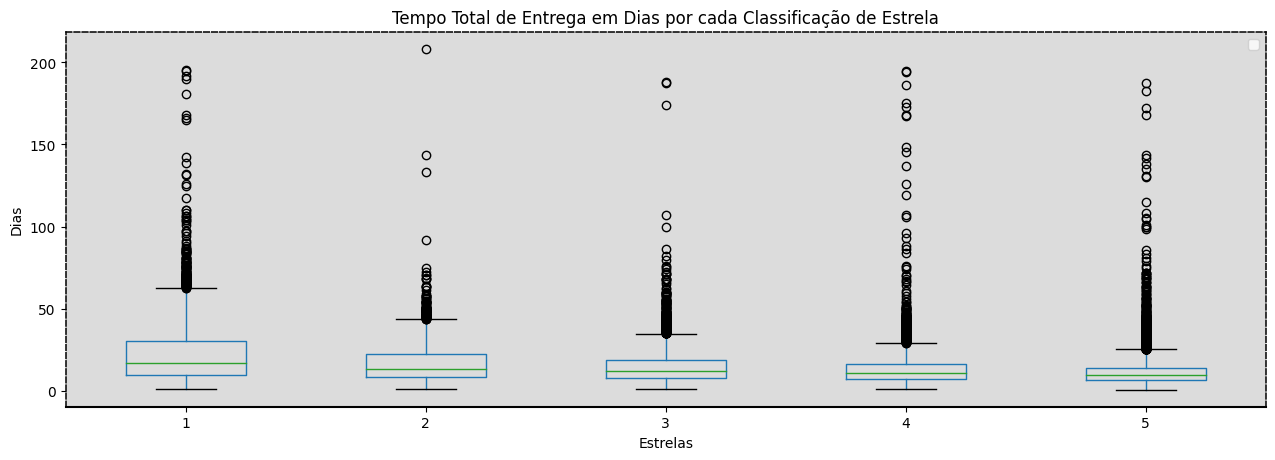

In [43]:
ax = estrelas_tempo_total_dias.boxplot(column='Tempo Total', by='Estrelas', figsize=(15,5))
_ = ax.set(xlabel='Estrelas', ylabel='Dias')

plt.title('Tempo Total de Entrega em Dias por cada Classificação de Estrela')
plt.suptitle('')

ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.grid()
ax.legend('')
plt.show()

### Extraindo do Gráfico
- No gráfico fornecido, há uma diferença significativa entre as entregas avaliadas com 5 estrelas e aquelas com apenas 1 estrela, mostrando uma forte correlação com o tempo total de entrega. À medida que avaliamos as classificações de 1 a 5 estrelas, observamos uma redução gradual no tempo de entrega, sugerindo uma conexão direta entre o tempo e a qualidade percebida, refletida na avaliação atribuída. No entanto, é fundamental destacar que a presença de outliers indica que o tempo de entrega nem sempre é o único fator influenciador das classificações. Esses casos atípicos, embora representem uma minoria dos dados analisados, podem ser afetados por diversos elementos, como a distância geográfica da região, que pode resultar em expectativas diferentes de tempo de entrega por parte do cliente. Portanto, é necessário apresentar um gráfico com a média para uma compreensão mais clara desses dados.



---



## Gráfico: Tempo Total Médio de Entrega em Dias por Classificação de Estrela

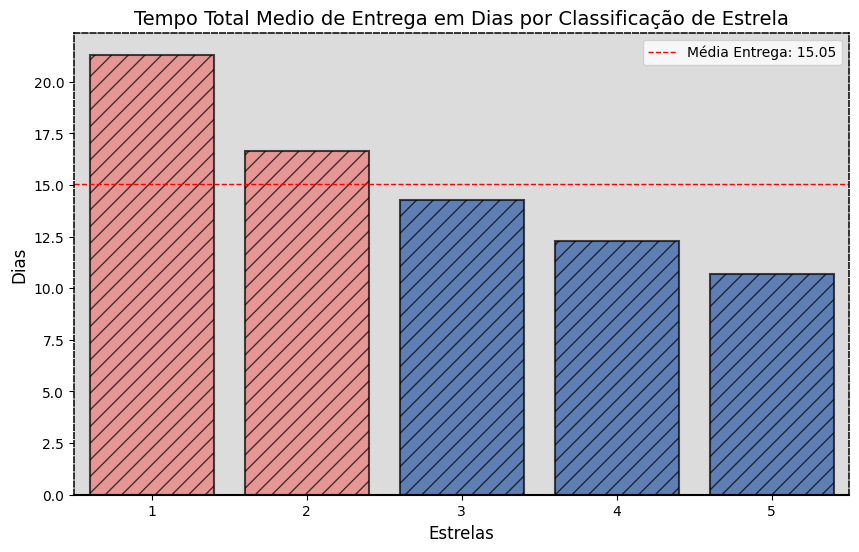

In [44]:
plt.figure(figsize=(10, 6))

palette = ['#FF6666', '#FF6666', '#1451b8', '#1451b8', '#1451b8']

ax = sns.barplot(x='Estrelas', y='Media Tempo Total', data=estrelas_media_tempo_total_dias, width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//', hue='Estrelas', palette=palette, legend=False)
plt.xlabel('Estrelas', fontsize=12)
plt.ylabel('Dias', fontsize=12)
plt.title('Tempo Total Medio de Entrega em Dias por Classificação de Estrela', fontsize=14)
plt.axhline(y=media_estrelas_media_tempo_total_dias, color='red', linestyle='--', linewidth=1, label=f'Média Entrega: {media_estrelas_media_tempo_total_dias:.2f}')

ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)

plt.legend()
plt.show()

### Extraindo do Gráfico
- No gráfico que exibe a média do tempo total de entrega por classificação de estrelas, podemos reforçar ainda mais as conclusões anteriores derivadas do gráfico anterior. É evidente que as classificações neutras e positivas estão todas abaixo da linha da média de atraso por dias, o que destaca ainda mais a relação entre as avaliações de estrelas negativas e o tempo de entrega. Portanto, agora devemos analisar em quais estágios do processo de entrega estamos enfrentando os maiores atrasos.



---



## Gráfico: Tempo Total Médio em Dias por Estrela para cada Etapa da Entrega

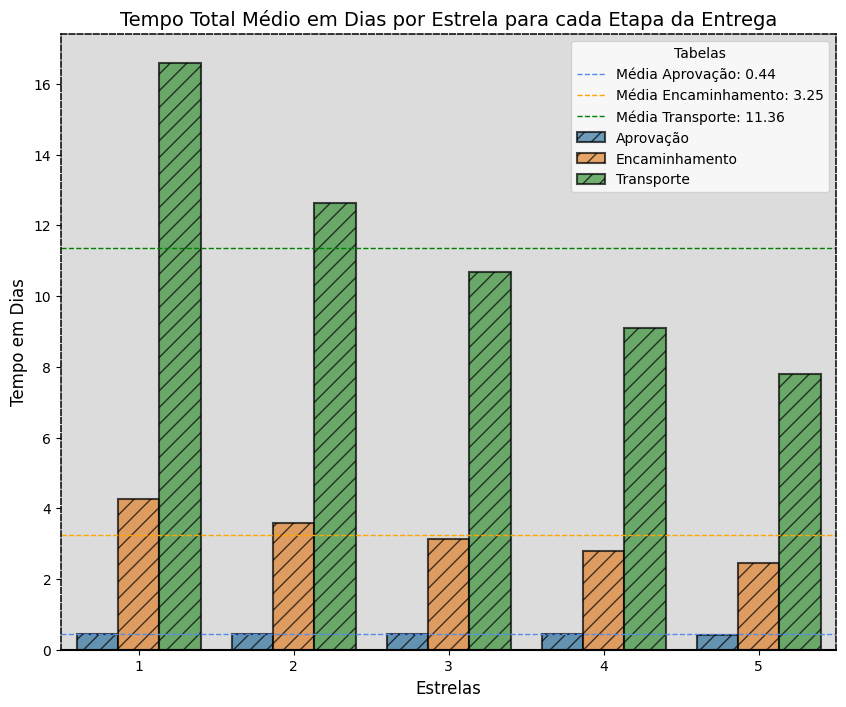

In [45]:
tabelas = [estrelas_media_tempo_aprovacao_dias, estrelas_media_tempo_encaminhamento_dias, estrelas_media_tempo_transporte_dias]
nomes_das_tabelas = ['Aprovação', 'Encaminhamento', 'Transporte']

data_concatenado = pd.concat(tabelas, keys=nomes_das_tabelas)

plt.figure(figsize=(10, 8))

plt.axhline(y=media_estrelas_media_tempo_aprovacao_dias, color='#538bec', linestyle='--', linewidth=1, label=f'Média Aprovação: {media_estrelas_media_tempo_aprovacao_dias:.2f}')
plt.axhline(y=media_estrelas_media_tempo_encaminhamento_dias, color='orange', linestyle='--', linewidth=1, label=f'Média Encaminhamento: {media_estrelas_media_tempo_encaminhamento_dias:.2f}')
plt.axhline(y=media_estrelas_media_tempo_transporte_dias, color='green', linestyle='--', linewidth=1, label=f'Média Transporte: {media_estrelas_media_tempo_transporte_dias:.2f}')
ax = sns.barplot(x='Estrelas', y='Tempo', hue=data_concatenado.index.get_level_values(0), data=data_concatenado, width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//')
ax.set_xlabel('Estrelas', fontsize=12)
ax.set_ylabel('Tempo em Dias', fontsize=12)
ax.set_title('Tempo Total Médio em Dias por Estrela para cada Etapa da Entrega', fontsize=14)
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
plt.legend(title='Tabelas')
plt.show()

### Extraindo do Gráfico
- Após análise detalhada, constatou-se que a etapa de aprovação do pedido mantém-se estável e dentro da média para todas as classificações de estrelas. No entanto, surge um desafio significativo na fase de encaminhamento para a transportadora, onde o tempo de entrega aumenta, resultando em avaliações negativas acima da média. O ponto crítico é a etapa de entrega, evidenciando uma disparidade considerável nas avaliações negativas. Essa discrepância é preocupante, pois o tempo de entrega desempenha um papel crucial na satisfação do cliente. Diante desse cenário, é essencial entender como esse fenômeno se manifesta em diferentes regiões e qual é o impacto disso nas classificações de estrelas em cada uma delas.



---



## Gráfico: Tempo Total Médio em Dias de Entrega por Região & Media de Estrelas por Região

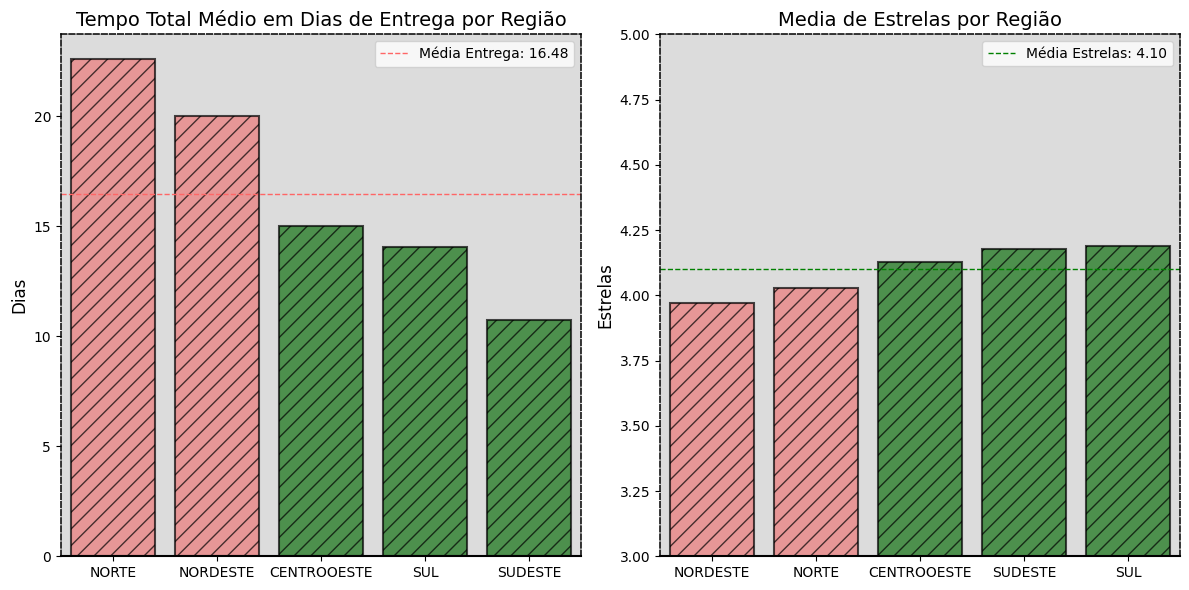

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

cores = ['#FF6666', '#FF6666', 'green', 'green', 'green']

sns.barplot(x='Regiao', y='Media Tempo Total', data=regiao_media_tempo_total_dias, ax=axes[0], hue='Regiao', palette=cores, legend=False, width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//')
axes[0].set_xlabel('', fontsize=12)
axes[0].set_ylabel('Dias', fontsize=12)
axes[0].set_title('Tempo Total Médio em Dias de Entrega por Região', fontsize=14)
axes[0].axhline(y=media_regiao_media_tempo_total_dias, color='#FF6666', linestyle='--', linewidth=1, label=f'Média Entrega: {media_regiao_media_tempo_total_dias:.2f}')
axes[0].legend()

sns.barplot(x='Regiao', y='Media Estrelas', data=regiao_media_estrelas, ax=axes[1], hue='Regiao', palette=cores, legend=False, width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//')
axes[1].set_xlabel('', fontsize=12)
axes[1].set_ylabel('Estrelas', fontsize=12)
axes[1].set_title('Media de Estrelas por Região', fontsize=14)
axes[1].set_ylim(3, 5)
axes[1].axhline(y=media_regiao_media_estrelas, color='green', linestyle='--', linewidth=1, label=f'Média Estrelas: {media_regiao_media_estrelas:.2f}')
axes[1].legend()

for i in axes:
  i.set_facecolor('#DCDCDC')
  i.spines['top'].set_linestyle('--')
  i.spines['left'].set_linestyle('--')
  i.spines['right'].set_linestyle('--')
  i.spines['top'].set_linewidth(1.1)
  i.spines['bottom'].set_linewidth(1.5)
  i.spines['left'].set_linewidth(1.1)
  i.spines['right'].set_linewidth(1.1)

plt.tight_layout()
plt.show()

# Conclusão da Análise

- Com base nas informações fornecidas, é imperativo considerar a notável discrepância no tempo de entrega ao cliente ao tomar decisões relacionadas à logística de entrega. Nossa análise revelou uma correlação clara entre o tempo de encaminhamento e a satisfação do cliente, conforme refletido nas classificações de estrelas. É essencial ressaltar que as regiões Norte e Nordeste, embora pouco exploradas, apresentam os tempos mais longos de entrega e as classificações mais baixas em termos de satisfação do cliente. Portanto, ao buscar aprimoramentos no processo de entrega, é vital priorizar estratégias que visem reduzir o tempo de encaminhamento, otimizar rotas, investir em tecnologias de rastreamento em tempo real e fornecer treinamento adequado para motoristas. Além disso, a construção de parcerias estratégicas e a implementação de sistemas de feedback contínuo são aspectos cruciais a serem considerados para assegurar uma experiência de entrega excepcional e maximizar a satisfação do cliente. Essas medidas não apenas fortalecerão nossa posição competitiva, mas também solidificarão nossa reputação como líderes em excelência na entrega de serviços.



---



# Métricas

- Métricas importantes a serem acompanhadas incluem o tempo médio de entrega em diferentes regiões, as classificações de estrelas dos clientes relacionadas à experiência de entrega (Gráfico: Tempo Total Médio em Dias de Entrega por Região & Media de Estrelas por Região).
- Além disso, o número de reclamações dos clientes relacionadas à entrega e a taxa de entregas bem-sucedidas podem servir como indicadores-chave do desempenho da logística de entrega (5º Análise).



---



# <br>

# 3º Análise: "Tendências de Mercado: Identificação de Oportunidades e Estratégias para Maximização de Receitas"

## Codigo

In [47]:
# Quantidade de Produtos por Categoria

query = '''SELECT product_category_name AS "Categoria", COUNT(product_id) AS "Quantidade Produtos"
           FROM products
           GROUP BY product_category_name
           ORDER BY "Nome da categoria";'''

categoria_produtos = sqldf(query, locals())
categoria_produtos

,Categoria,Quantidade Produtos
0,Sem Categoria,610
1,agro_industria_e_comercio,74
2,alimentos,82
3,alimentos_bebidas,104
4,artes,55
...,...,...
69,sinalizacao_e_seguranca,93
70,tablets_impressao_imagem,9
71,telefonia,1134
72,telefonia_fixa,116


In [48]:
# Quantidade de Produtos Pedidos por Categoria

query = '''SELECT product_category_name AS "Categoria", COUNT(products.product_id) AS "Quantidade Produtos Pedidos"
           FROM products
           INNER JOIN order_items ON order_items.product_id == products.product_id
           GROUP BY product_category_name
           ORDER BY "Nome da categoria";'''

categoria_produtos_pedidos = sqldf(query, locals())
categoria_produtos_pedidos

,Categoria,Quantidade Produtos Pedidos
0,Sem Categoria,1603
1,agro_industria_e_comercio,212
2,alimentos,510
3,alimentos_bebidas,278
4,artes,209
...,...,...
69,sinalizacao_e_seguranca,199
70,tablets_impressao_imagem,83
71,telefonia,4545
72,telefonia_fixa,264


In [49]:
# Media de Pedidos por Categoria e Quantidade de Produtos e Produtos Pedidos

media_pedidos_produto = pd.DataFrame()
media_pedidos_produto['Categoria'] = categoria_produtos["Categoria"]
media_pedidos_produto['Media Pedidos Categoria'] = categoria_produtos_pedidos["Quantidade Produtos Pedidos"] /categoria_produtos["Quantidade Produtos"]
media_pedidos_produto["Quantidade Produtos Pedidos"] = categoria_produtos_pedidos["Quantidade Produtos Pedidos"]
media_pedidos_produto["Quantidade Produtos"] = categoria_produtos["Quantidade Produtos"]
media_pedidos_produto = media_pedidos_produto.sort_values(by='Media Pedidos Categoria', ascending=False)
media_pedidos_produto

,Categoria,Media Pedidos Categoria,Quantidade Produtos Pedidos,Quantidade Produtos
18,cds_dvds_musicais,14.000000,14,1
70,tablets_impressao_imagem,9.222222,83,9
62,pcs,6.766667,203,30
8,audio,6.275862,364,58
2,alimentos,6.219512,510,82
...,...,...,...,...
47,la_cuisine,1.400000,14,10
39,fashion_roupa_masculina,1.389474,132,95
28,dvds_blu_ray,1.333333,64,48
5,artes_e_artesanato,1.263158,24,19


In [50]:
# Calculo das Medias
media_qnt_pedidos_categoria = media_pedidos_produto["Quantidade Produtos Pedidos"].mean()
media_qnt_produtos = media_pedidos_produto["Quantidade Produtos"].mean()
media_qnt_produtos

445.2837837837838

In [51]:
# Media de Pedidos por Categoria com Mais Pedidos e Produtos do que a Media

query = '''SELECT "Categoria", "Media Pedidos Categoria"
           FROM media_pedidos_produto
           WHERE "Quantidade Produtos Pedidos" > 1522.3
           AND "Quantidade Produtos" > 445.28;'''

media_pedidos_produto_filtro = sqldf(query, locals())
media_pedidos_produto_filtro

,Categoria,Media Pedidos Categoria
0,ferramentas_jardim,5.772908
1,eletronicos,5.352031
2,cool_stuff,4.811153
3,informatica_acessorios,4.775473
4,relogios_presentes,4.507901
5,telefonia,4.007937
6,beleza_saude,3.956628
7,perfumaria,3.938940
8,cama_mesa_banho,3.669528
9,bebes,3.335147


In [52]:
# Media de Pedidos por Categoria so os Melhores Produtos

query = '''SELECT *
           FROM media_pedidos_produto_filtro
           LIMIT 5;'''

media_pedidos_produto_filtro_top = sqldf(query, locals())
media_pedidos_produto_filtro_top

,Categoria,Media Pedidos Categoria
0,ferramentas_jardim,5.772908
1,eletronicos,5.352031
2,cool_stuff,4.811153
3,informatica_acessorios,4.775473
4,relogios_presentes,4.507901


In [53]:
# Media de Avaliação por Categoria

query = '''SELECT product_category_name AS "Categorias", ROUND(AVG(review_score), 2) AS "Media Estrelas"
           FROM products
           INNER JOIN order_items ON order_items.product_id = products.product_id
           INNER JOIN orders ON orders.order_id = order_items.order_id
           INNER JOIN order_reviews ON order_reviews.order_id = orders.order_id
           WHERE "Categorias" == "ferramentas_jardim" OR
           "Categorias" == "eletronicos" OR
           "Categorias" == "cool_stuff" OR
           "Categorias" == "informatica_acessorios" OR
           "Categorias" == "relogios_presentes"
           GROUP BY product_category_name
           ORDER BY "Media Estrelas" DESC;'''

categoria_media_estrelas = sqldf(query, locals())
categoria_media_estrelas.head()

,Categorias,Media Estrelas
0,cool_stuff,4.19
1,ferramentas_jardim,4.08
2,relogios_presentes,4.07
3,eletronicos,4.07
4,informatica_acessorios,3.99


In [54]:
# Medias Utilizadas

media_categoria_produtos = categoria_produtos['Quantidade Produtos'].mean()
media_categoria_produtos_pedidos = categoria_produtos_pedidos['Quantidade Produtos Pedidos'].mean()
media_pedidos_produto_filtro_media = media_pedidos_produto_filtro['Media Pedidos Categoria'].mean()



---



## Gráfico: Quantidade de Produtos e Produtos Pedidos por Categoria

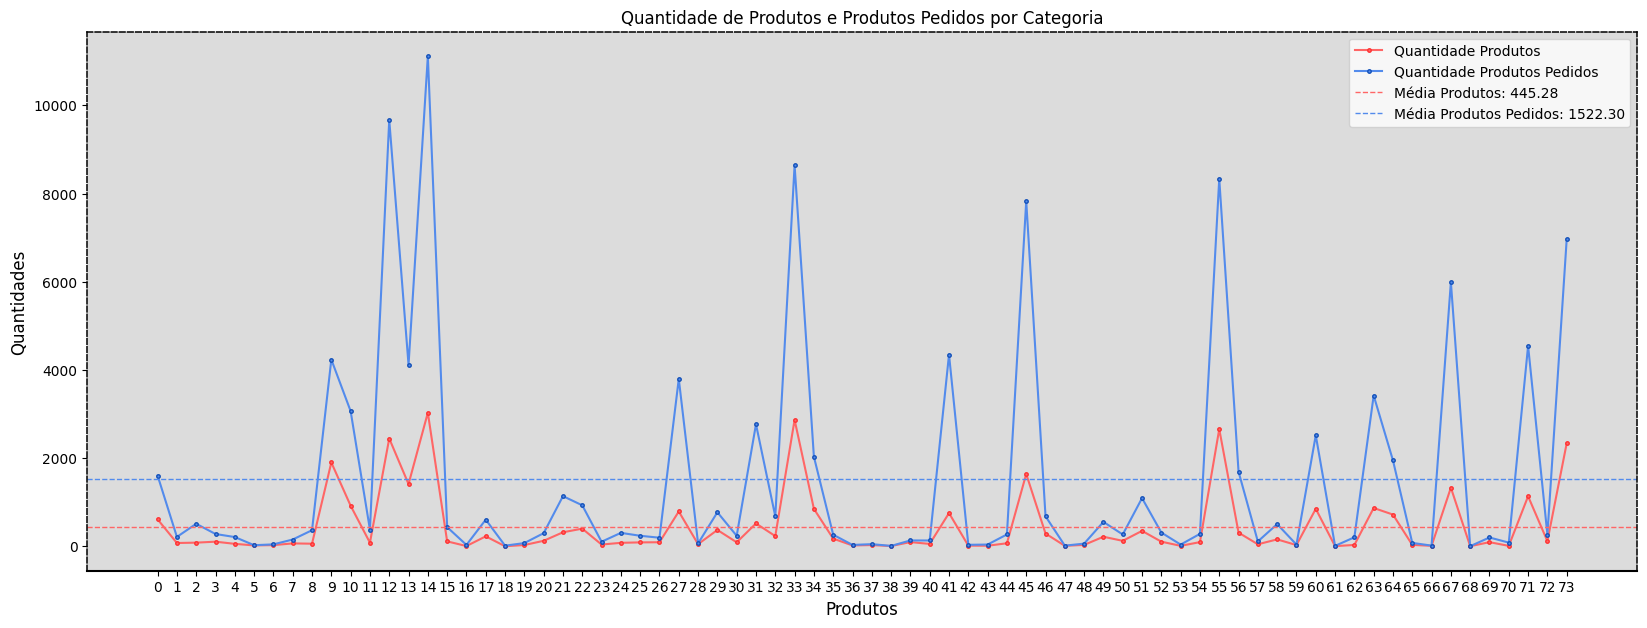

In [55]:
fig, ax = plt.subplots(figsize=(20, 7))

categoria_produtos.plot.line(ax=ax, label='Quantidade de Produtos Por Categoria', linewidth=1.5, color = '#FF6666', marker='.', markersize=5, markeredgecolor='#ff3232', markerfacecolor='#FF6666')
categoria_produtos_pedidos.plot.line(ax=ax, label='Quantidade de Produtos Pedidos Por Categoria', linewidth=1.5, color = '#538bec', marker='.', markersize=5, markeredgecolor='#1451b8', markerfacecolor='#538bec')

ax.set_xticks(range(0, len(categoria_produtos.index)))


plt.axhline(y=media_categoria_produtos, color='#FF6666', linestyle='--', linewidth=1, label=f'Média Produtos: {media_categoria_produtos:.2f}')
plt.axhline(y=media_categoria_produtos_pedidos, color='#538bec', linestyle='--', linewidth=1, label=f'Média Produtos Pedidos: {media_categoria_produtos_pedidos:.2f}')
ax.set_ylabel('Quantidades', fontsize=12)
ax.set_xlabel('Produtos', fontsize=12)
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
plt.title('Quantidade de Produtos e Produtos Pedidos por Categoria')
plt.legend()
plt.show()

### Extraindo do Gráfico
- Ao examinar o gráfico, observamos que muitas categorias crescem proporcionalmente à quantidade de produtos contidos nelas. No entanto, também é evidente que há uma grande variedade de produtos, alguns dos quais estão firmemente estabelecidos no mercado, enquanto outros não. Ao considerar uma análise mais aprofundada, é crucial filtrar os dados para incluir apenas produtos que demonstrem estabilidade e estabelecimento no mercado pré-determinado. Por exemplo, considerar produtos que apresentam uma quantidade significativa de pedidos em relação à média geral da categoria pode proporcionar uma visão mais precisa e realista. Isso evita distorções nos dados, como a inclusão de produtos com apenas alguns pedidos, que poderiam distorcer as métricas e análises, oferecendo insights mais confiáveis e relevantes para a tomada de decisões estratégicas.



---



## Gráfico: Média de Pedidos por Categoria Filtrada (Acima da Media)

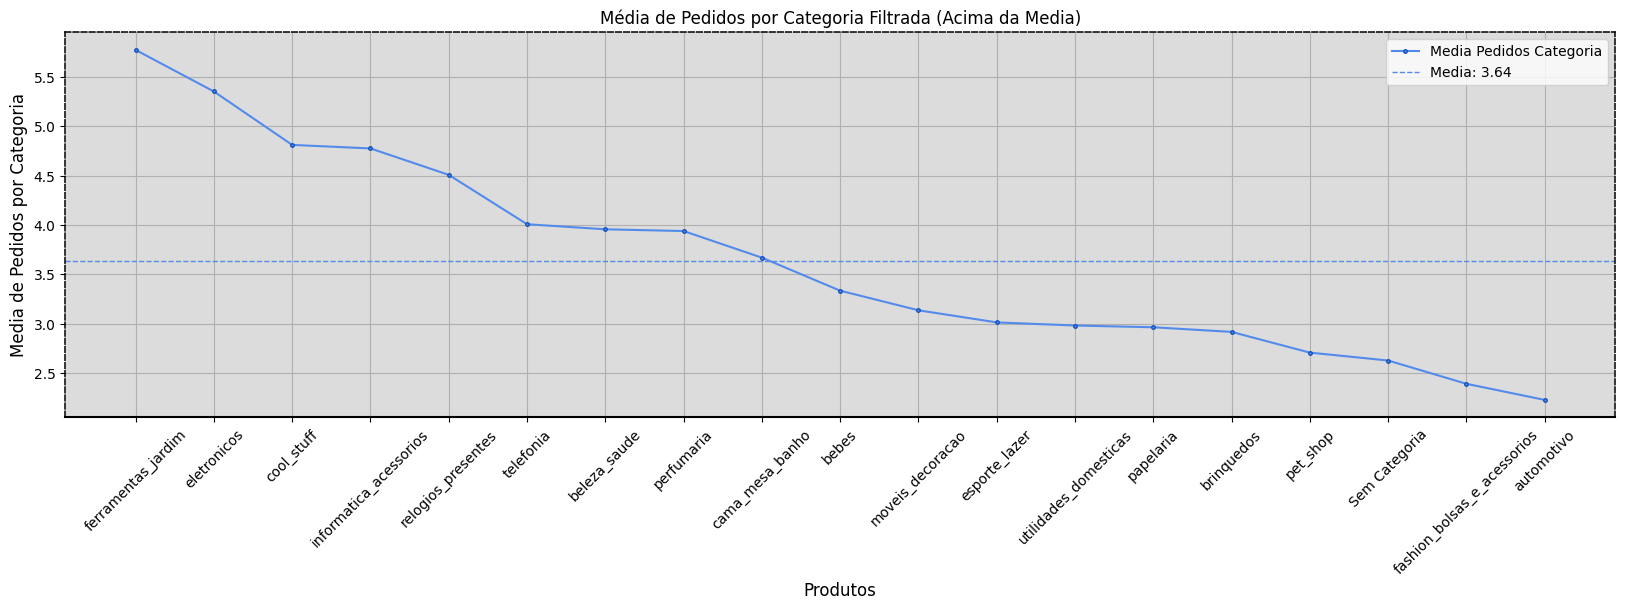

In [56]:
fig, ax = plt.subplots(figsize=(20, 5))

media_pedidos_produto_filtro.plot.line(ax=ax, label='', linewidth=1.5, color = '#538bec', marker='.', markersize=5, markeredgecolor='#1451b8', markerfacecolor='#538bec')

ax.set_xticks(range(0, len(media_pedidos_produto_filtro.index)))
ax.set_xticklabels(media_pedidos_produto_filtro["Categoria"], rotation=45)

plt.axhline(y=media_pedidos_produto_filtro_media, color='#538bec', linestyle='--', linewidth=1, label=f'Media: {media_pedidos_produto_filtro_media:.2f}')
ax.set_ylabel('Media de Pedidos por Categoria', fontsize=12)
ax.set_xlabel('Produtos', fontsize=12)
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
plt.title('Média de Pedidos por Categoria Filtrada (Acima da Media)')
plt.grid()
plt.legend()
plt.show()

### Extraindo do Gráfico
- Ao focarmos exclusivamente nas categorias que superam a média em relação às demais, podemos realizar uma análise mais detalhada. Ao aplicar outro critério de média, identificamos as categorias de destaque entre as melhores. Embora nove produtos se mantenham acima da média, a diferença de desempenho do produto com maior média de pedidos é notável. Na próxima etapa da análise, vamos comparar os cinco primeiros produtos que apresentam médias semelhantes entre si. No entanto, para determinar quais desses têm o maior potencial de gerar receita, precisamos conduzir a uma análise final. Esta análise nos permitirá identificar os produtos que se destacam entre os melhores e têm um potencial excepcional para impulsionar a receita total da empresa.



---



## Gráfico: Média de Classificação de Estrelas por Categoria

<ipython-input-57-d58187f12277>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(), rotation=30)


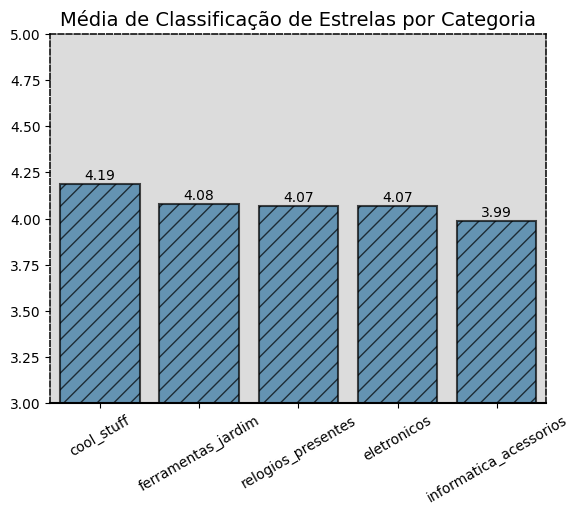

In [57]:
plt= sns.barplot(x='Categorias', y="Media Estrelas", data=categoria_media_estrelas, width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//')

plt.set_xticklabels(plt.get_xticklabels(), rotation=30)

for index, row in categoria_media_estrelas.iterrows():
    plt.annotate('{:.2f}'.format(row['Media Estrelas']),
                 xy=(index, row['Media Estrelas']),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center',
                 fontsize=10)

plt.set_xlabel('', fontsize=12)
plt.set_ylabel('', fontsize=12)
plt.set_title('Média de Classificação de Estrelas por Categoria', fontsize=14)
plt.set_ylim(3, 5)
plt.set_facecolor('#DCDCDC')
plt.spines['top'].set_linestyle('--')
plt.spines['left'].set_linestyle('--')
plt.spines['right'].set_linestyle('--')
plt.spines['top'].set_linewidth(1.1)
plt.spines['bottom'].set_linewidth(1.5)
plt.spines['left'].set_linewidth(1.1)
plt.spines['right'].set_linewidth(1.1)

# Conclusão da Análise

- Com base na análise realizada, a recomendação estratégica para a empresa é concentrar recursos adicionais na categoria "cool_stuff", aproveitando sua alta satisfação entre os clientes e seu significativo volume de pedidos. Investir em ampliação do sortimento, campanhas de marketing específicas, aprimoramento da experiência do cliente, parcerias estratégicas e otimização da logística de entrega para essa categoria pode potencializar seu crescimento e contribuir significativamente para o sucesso do marketplace, mantendo-o alinhado às demandas e preferências dos consumidores. Essa estratégia visa capitalizar as oportunidades de expansão e maximizar o retorno sobre o investimento, consolidando a posição da empresa como líder no mercado e impulsionando seu crescimento futuro.



---



# Métricas

- Métricas importantes a serem acompanhadas incluem o volume de vendas (Gráfico: Média de Pedidos por Categoria Filtrada) e a classificação média de estrelas para cada categoria de produtos ao longo do tempo (Gráfico: Média de Classificação de Estrelas por Categoria).
- Além disso, a análise de tendências de compra dos clientes e a identificação de produtos ou categorias emergentes podem fornecer insights valiosos para futuras estratégias de marketing e expansão de produtos (Gráfico: Média de Pedidos por Categoria Filtrada).



---



# <br>

# 4º Análise: "Oportunidades de Melhoria: Análise do Desempenho de Vendas nos Estados Brasileiros"

## Codigo

In [65]:
# Vendedores, Produtos Vendidos e Media de Produtos Vendidos por Estado

query = '''SELECT seller_state AS "Estado", COUNT(DISTINCT sellers.seller_id) AS "Vendedores", COUNT(customer_state) AS "Produtos Vendidos",
             (COUNT(customer_state) / COUNT(DISTINCT sellers.seller_id)) AS "Media Vendas"
             FROM customers
             INNER JOIN orders ON orders.customer_id = customers.customer_id
             INNER JOIN order_items ON order_items.order_id = orders.order_id
             INNER JOIN sellers ON sellers.seller_id = order_items.seller_id
             INNER JOIN products ON products.product_id = order_items.product_id
             GROUP BY seller_state
             ORDER BY seller_region;'''

estado_vendedores_produtos_vendidos_media_vendidos = sqldf(query, locals())
estado_vendedores_produtos_vendidos_media_vendidos.head()

,Estado,Vendedores,Produtos Vendidos,Media Vendas
0,DF,30,883,29
1,GO,39,508,13
2,MS,5,50,10
3,MT,4,144,36
4,BA,18,624,34


In [66]:
# Media de Vendas por Estado de um Grupo de mais de 10 Vendedores

query = '''SELECT "Estado", "Media Vendas"
           FROM estado_vendedores_produtos_vendidos_media_vendidos
           WHERE "Vendedores" > 10;'''

estado_media_vendas = sqldf(query, locals())
estado_media_vendas.head()

,Estado,Media Vendas
0,DF,29
1,GO,13
2,BA,34
3,CE,7
4,ES,16


In [67]:
# Medias Utilizadas

media_estado_media_vendas = estado_media_vendas["Media Vendas"].mean()



---



## Gráfico: Quantidade de Vendedores por Estado/Regiao

In [68]:
# se deu erro, roda de novo a importação da bibliotecas
# if you got and error, execute the imports again

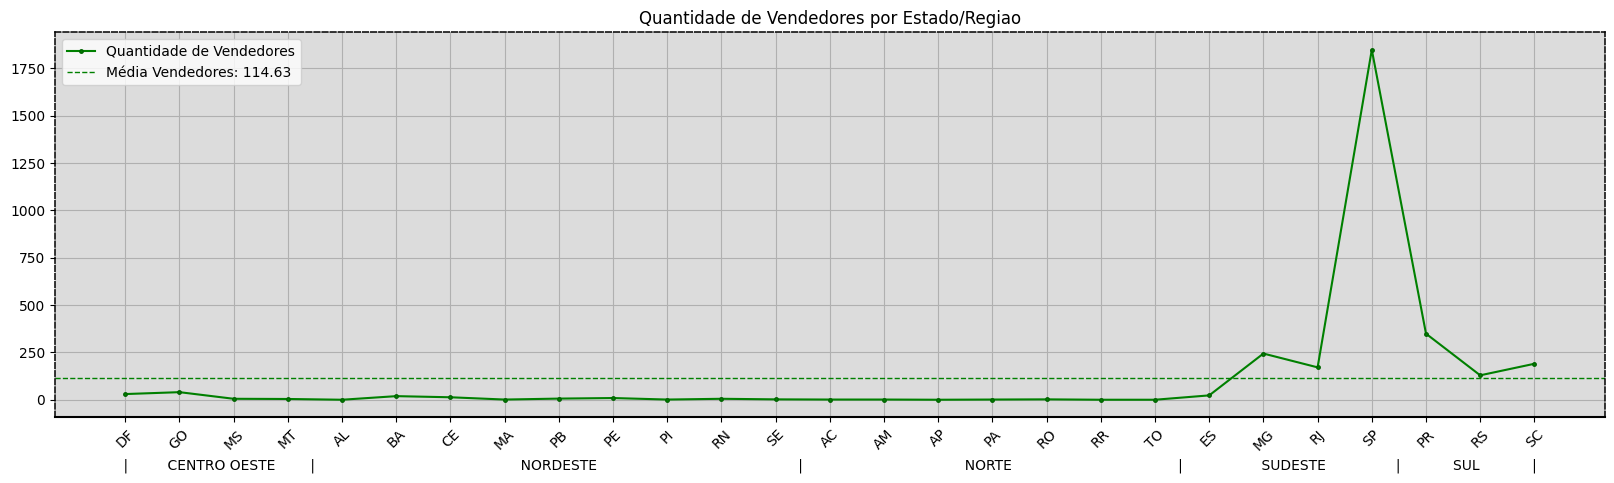

In [69]:
fig, ax = plt.subplots(figsize=(20, 5))

vendedores_por_estado.plot.line(ax=ax, label='Quantidade de Vendedores', linewidth=1.5, color='green', marker='.', markersize=5, markeredgecolor='darkgreen', markerfacecolor='green')

ax.set_xticks(range(0, len(vendedores_por_estado.index)))
ax.set_xticklabels(vendedores_por_estado["Estados"], rotation=45)
ax.axhline(y=media_vendedores_por_estado, color='green', linestyle='--', linewidth=1, label=f'Média Vendedores: {media_vendedores_por_estado:.2f}')

ax.set_xlabel('    |         CENTRO OESTE        |                                               NORDESTE                                              |                                     NORTE                                      |                  SUDESTE                |            SUL            |    ')
ax.set_ylabel('')

plt.title('Quantidade de Vendedores por Estado/Regiao')
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.grid()
ax.legend()

plt.show()

### Extraindo do Gráfico
- Neste gráfico, podemos visualizar a quantidade de vendedores por região/estado, fornecendo uma visão geral da distribuição geográfica dos vendedores. Com essa informação em mãos, podemos agora explorar se alguns vendedores em determinadas regiões estão tendo rendimentos abaixo da média. Essa análise nos permitirá identificar possíveis disparidades no desempenho financeiro dos vendedores em diferentes regiões e tomar medidas adequadas para abordar essas questões.



---



## Gráfico: Quantidade de Vendedores por Estado e Média de Produtos Vendidos por Estado

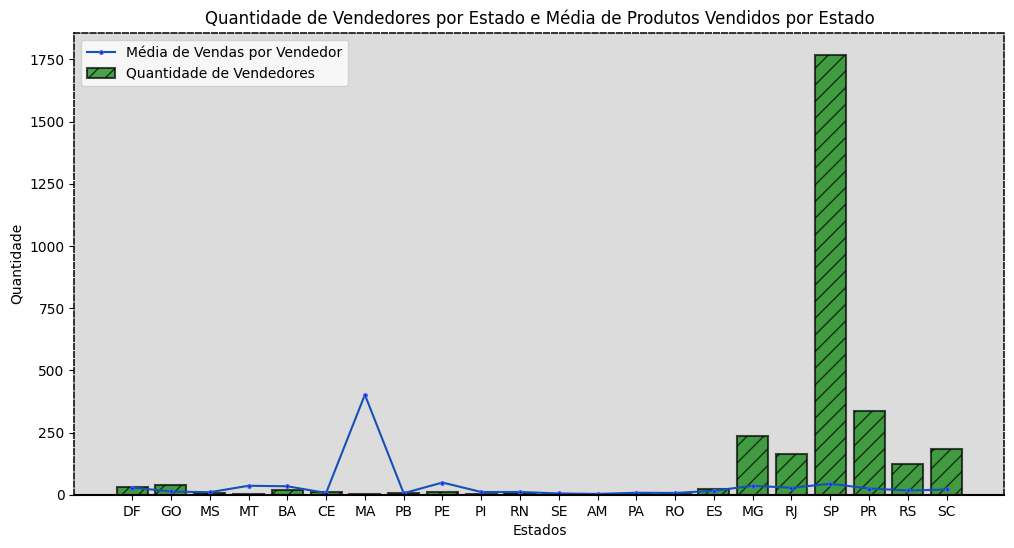

In [70]:
estados = estado_vendedores_produtos_vendidos_media_vendidos["Estado"]
quantidade_vendedores = estado_vendedores_produtos_vendidos_media_vendidos["Vendedores"]
media_vendas_por_vendedor = estado_vendedores_produtos_vendidos_media_vendidos["Media Vendas"]

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(estados, quantidade_vendedores, color='green', label='Quantidade de Vendedores', width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//')

ax.plot(estados, media_vendas_por_vendedor, label='Média de Vendas por Vendedor', linewidth=1.5, color = '#1451b8', marker='.', markersize=5, markeredgecolor='royalblue', markerfacecolor='blue')

ax.set_ylabel('Quantidade')
ax.set_xlabel('Estados')

plt.title('Quantidade de Vendedores por Estado e Média de Produtos Vendidos por Estado')
ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.legend()

plt.show()

### Extraindo do Gráfico
- Após analisar o gráfico, identificamos a presença de outliers, provavelmente devido a estados com apenas um vendedor que teve algumas vendas, resultando em uma média muito alta. Com essa percepção, entendemos a importância de implementar um filtro para considerar apenas equipes de mais de 10 vendedores, uma quantidade considerável, para uma análise mais precisa e significativa. Isso nos permitirá focar em regiões onde há uma presença mais substancial de vendedores e, portanto, dados mais representativos para análise.



---



## Gráfico: Média de Produtos Vendidos por Estado com mais de 10 Vendedores

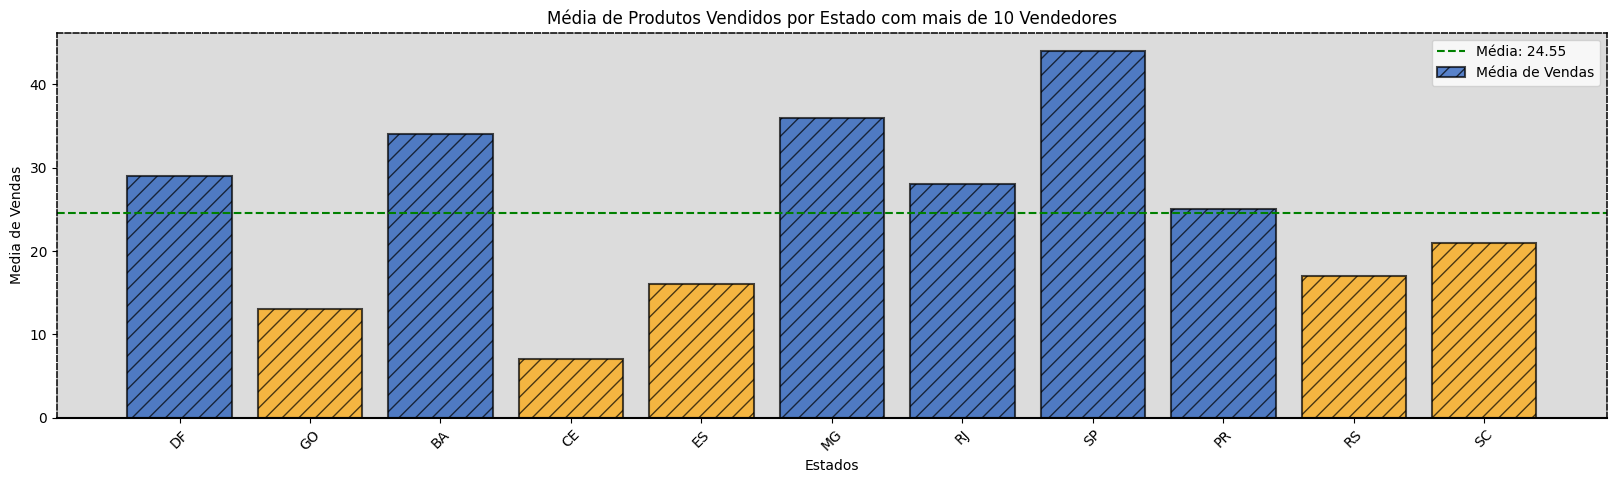

In [71]:
fig, ax = plt.subplots(figsize=(20, 5))

palette = ['#1451b8', 'orange', '#1451b8', 'orange', 'orange', '#1451b8', '#1451b8', '#1451b8', '#1451b8', 'orange', 'orange']

ax.bar(range(len(estado_media_vendas)), estado_media_vendas['Media Vendas'], label='Média de Vendas', width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//', color=palette)

ax.axhline(y=media_estado_media_vendas, color='green', linestyle='--', label=f'Média: {media_estado_media_vendas:.2f}')

ax.set_xticks(range(len(estado_media_vendas)))
ax.set_xticklabels(estado_media_vendas['Estado'], rotation=45)

ax.set_ylabel('Media de Vendas')
ax.set_xlabel('Estados')

plt.title('Média de Produtos Vendidos por Estado com mais de 10 Vendedores')

ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.legend()

plt.show()

# Conclusao da Análise

- A análise revela que os estados de Goiás (GO), Ceará (CE), Espírito Santo (ES), Rio Grande do Sul (RS) e Santa Catarina (SC) estão enfrentando uma média de vendas por vendedor abaixo da média das outras regiões com mais de 10 vendedores, indicando oportunidades de melhoria no desempenho de vendas. Para melhorar, é essencial investir em treinamento e desenvolvimento dos vendedores, implementar programas de motivação e incentivo, garantir suporte e recursos adequados, além de realizar uma análise de mercado mais profunda para adaptar as estratégias de vendas às necessidades locais. Acompanhamento regular e ajustes contínuos são fundamentais para garantir o sucesso dessas iniciativas e impulsionar o desempenho de vendas nessas regiões.
<br><br>
- Insight: Os treinamentos poderiam levar como estatistica crucial, quais as categorias de produtos mais promissores (3º Análise).



---



# Métricas

- Métricas importantes a serem acompanhadas incluem o aumento nas vendas por vendedor após a implementação de medidas de treinamento e desenvolvimento, o impacto das iniciativas de motivação e incentivo no desempenho de vendas (Gráfico: Média de Produtos Vendidos por Estado com mais de 10 Vendedores).



---



# <br>

# 5º Análise: "Desvendando a Experiência do Cliente: Insights Cruciais para Melhorias Estratégicas"

## Codigo

In [72]:
# Quantidade Comentarios 5 Estrela por Agrupamento

query26 = '''SELECT LOWER(review_comment_message) AS "Comentario", COUNT(*) AS Quantidade
             FROM order_reviews
             WHERE review_score = 5
             AND "Comentario" != "sem comentarios"
             GROUP BY "Comentario"
             ORDER BY quantidade DESC
             LIMIT 5;'''

quantidade_comentarios_5_estrela = sqldf(query26, locals())
quantidade_comentarios_5_estrela

,Comentario,Quantidade
0,muito bom,278
1,otimo,177
2,bom,132
3,recomendo,121
4,excelente,104


In [73]:
# Quantidade Comentarios 4 Estrela por Agrupamento

query = '''SELECT LOWER(review_comment_message) AS "Comentario", COUNT(*) AS Quantidade
             FROM order_reviews
             WHERE review_score = 4
             AND "Comentario" != "sem comentarios"
             GROUP BY "Comentario"
             ORDER BY quantidade DESC
             LIMIT 5;'''

quantidade_comentarios_4_estrela = sqldf(query, locals())
quantidade_comentarios_4_estrela

,Comentario,Quantidade
0,bom,107
1,muito bom,75
2,recomendo,39
3,ok,31
4,boa,30


In [74]:
# Quantidade Comentarios 3 Estrela por Agrupamento

query = '''SELECT LOWER(review_comment_message) AS "Comentario", COUNT(*) AS Quantidade
             FROM order_reviews
             WHERE review_score = 3
             AND "Comentario" != "sem comentarios"
             GROUP BY "Comentario"
             ORDER BY quantidade DESC
             LIMIT 5;'''

quantidade_comentarios_3_estrela = sqldf(query, locals())
quantidade_comentarios_3_estrela

,Comentario,Quantidade
0,bom,57
1,muito bom,16
2,boa,15
3,recomendo,13
4,ok,13


In [75]:
# Quantidade Comentarios 2 Estrela por Agrupamento

query = '''SELECT LOWER(review_comment_message) AS "Comentario", COUNT(*) AS Quantidade
             FROM order_reviews
             WHERE review_score = 2
             AND "Comentario" != "sem comentarios"
             GROUP BY "Comentario"
             ORDER BY quantidade DESC
             LIMIT 20;'''

quantidade_comentarios_2_estrela = sqldf(query, locals())
quantidade_comentarios_2_estrela

,Comentario,Quantidade
0,bom,6
1,ok,4
2,ainda não recebi o produto,4
3,o produto veio com defeito! espero que não dem...,3
4,não recebi o produto,3
5,demora na entrega,3
6,veio com um defeito no acrílico que fica bem a...,2
7,uma loja que só pensa em pegar o dinheiro do c...,2
8,solicitei a devolução mas já se passaram as 48...,2
9,recebi apenas um dos produtos e a empresa não ...,2


In [76]:
# Quantidade Comentarios 1 Estrela por Agrupamento

query = '''SELECT LOWER(review_comment_message) AS "Comentario", COUNT(*) AS Quantidade
             FROM order_reviews
             WHERE review_score = 1
             AND "Comentario" != "sem comentarios"
             GROUP BY "Comentario"
             ORDER BY quantidade DESC
             LIMIT 20;'''

quantidade_comentarios_1_estrela = sqldf(query, locals())
quantidade_comentarios_1_estrela

,Comentario,Quantidade
0,não recebi o produto,37
1,nao recebi o produto,20
2,não recebi o produto,15
3,não recebi,15
4,ainda não recebi o produto,11
5,produto não entregue,10
6,ainda não recebi,10
7,não recebi o produto.,8
8,ainda nao recebi o produto,8
9,ruim,7


In [77]:
# Comentarios Negativos relacionados a Produtos Errados

query = '''SELECT COUNT(*) AS "Comentarios Negativos relacionados a Produtos Errados"
             FROM order_reviews
             WHERE (review_score = 1 OR review_score = 2)
             AND LOWER(review_comment_message) LIKE '%errado%';'''

comentarios_filtro_errados = sqldf(query, locals())
comentarios_filtro_errados

,Comentarios Negativos relacionados a Produtos Errados
0,282


In [78]:
# Comentarios Negativos relacionados a Defeito

query = '''SELECT COUNT(*) AS "Comentarios Negativos relacionados a Defeito"
             FROM order_reviews
             WHERE (review_score = 1 OR review_score = 2)
             AND LOWER(review_comment_message) LIKE '%defeito%';'''

comentarios_filtro_defeito = sqldf(query, locals())
comentarios_filtro_defeito

,Comentarios Negativos relacionados a Defeito
0,271


In [79]:
# Comentarios Negativos relacionados Produto nao entregue

query = '''SELECT COUNT(*) AS "Comentarios Negativos relacionados Produto nao entregue"
             FROM order_reviews
             WHERE (review_score = 1 OR review_score = 2)
             AND
             (((LOWER(review_comment_message) LIKE '%não%' OR LOWER(review_comment_message) LIKE '%nao%')
             AND LOWER(review_comment_message) LIKE '%recebi%')
             OR
             ((LOWER(review_comment_message) LIKE '%não%' OR LOWER(review_comment_message) LIKE '%nao%')
             AND LOWER(review_comment_message) LIKE '%entregue%')
             OR
             ((LOWER(review_comment_message) LIKE '%não%' OR LOWER(review_comment_message) LIKE '%nao%')
             AND LOWER(review_comment_message) LIKE '%chegou%'));'''

comentarios_filtro_nao_entregue = sqldf(query, locals())
comentarios_filtro_nao_entregue

,Comentarios Negativos relacionados Produto nao entregue
0,3568


In [80]:
# Comentarios Negativos relacionados com Atraso

query = '''SELECT COUNT(*) AS "Comentarios Negativos relacionados com Atraso"
             FROM order_reviews
             WHERE (review_score = 1 OR review_score = 2)
             AND (LOWER(review_comment_message) LIKE '%demora%'
             OR LOWER(review_comment_message) LIKE '%atraso%'
             OR LOWER(review_comment_message) LIKE '%demorou%'
             OR LOWER(review_comment_message) LIKE '%atrasou%');'''

comentarios_filtro_atraso = sqldf(query, locals())
comentarios_filtro_atraso

,Comentarios Negativos relacionados com Atraso
0,624


In [81]:
# Comentarios Negativos relacionados com Devolução

query = '''SELECT COUNT(*) AS "Comentarios Negativos relacionados com Devolução"
             FROM order_reviews
             WHERE (review_score = 1 OR review_score = 2)
             AND (LOWER(review_comment_message) LIKE '%devolucao%'
             OR LOWER(review_comment_message) LIKE '%devoluçao%'
             OR LOWER(review_comment_message) LIKE '%devolucão%'
             OR LOWER(review_comment_message) LIKE '%devolução%');'''

comentarios_filtro_devolucao = sqldf(query, locals())
comentarios_filtro_devolucao

,Comentarios Negativos relacionados com Devolução
0,265


In [82]:
# Comentarios Negativos relacionados com Reembolso

query = '''SELECT COUNT(*) AS "Comentarios Negativos relacionados com Reembolso"
             FROM order_reviews
             WHERE (review_score = 1 OR review_score = 2)
             AND (LOWER(review_comment_message) LIKE '%reembolso%'
             OR LOWER(review_comment_message) LIKE '%reembolsar%');'''

comentarios_filtro_reembolso = sqldf(query, locals())
comentarios_filtro_reembolso

,Comentarios Negativos relacionados com Reembolso
0,86


In [83]:
comentarios_negativos_filtrados = pd.DataFrame()
comentarios_negativos_filtrados["Nao entregue"] = comentarios_filtro_nao_entregue["Comentarios Negativos relacionados Produto nao entregue"]
comentarios_negativos_filtrados['Atraso'] = comentarios_filtro_atraso["Comentarios Negativos relacionados com Atraso"]
comentarios_negativos_filtrados['Errados'] = comentarios_filtro_errados["Comentarios Negativos relacionados a Produtos Errados"]
comentarios_negativos_filtrados['Defeito'] = comentarios_filtro_defeito["Comentarios Negativos relacionados a Defeito"]
comentarios_negativos_filtrados['Devolucao'] = comentarios_filtro_devolucao["Comentarios Negativos relacionados com Devolução"]
comentarios_negativos_filtrados['Reembolso'] = comentarios_filtro_reembolso["Comentarios Negativos relacionados com Reembolso"]
comentarios_negativos_filtrados

,Nao entregue,Atraso,Errados,Defeito,Devolucao,Reembolso
0,3568,624,282,271,265,86




---



## Gráfico: Quantidade de Comentários Negativos por Tipos

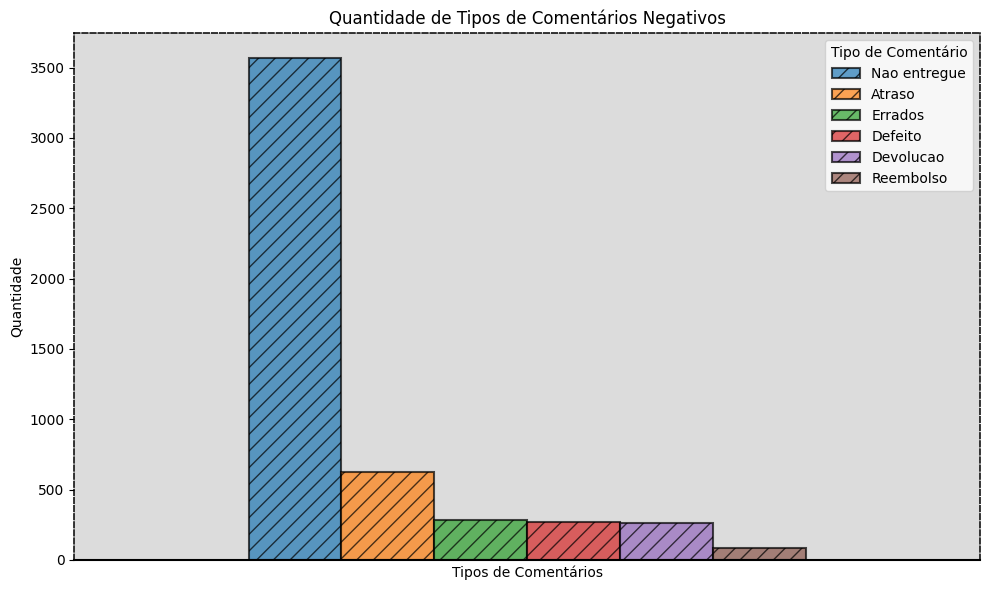

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))

comentarios_negativos_filtrados.plot(kind='bar', ax=ax, width=0.8, edgecolor='black', linewidth=1.5, alpha=0.7, hatch='//')

plt.ylabel('Quantidade')
plt.title('Quantidade de Tipos de Comentários Negativos')
plt.xlabel('Tipos de Comentários')
plt.xticks([])
plt.xticks(rotation=45)

plt.legend(title='Tipo de Comentário')

ax.set_facecolor('#DCDCDC')
ax.spines['top'].set_linestyle('--')
ax.spines['left'].set_linestyle('--')
ax.spines['right'].set_linestyle('--')
ax.spines['top'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
plt.tight_layout()
plt.show()

# Conclusão da Análise

- Com base nas análises realizadas, identificamos que a maioria das reclamações dos clientes está relacionada à não entrega de produtos, seguida por atrasos. No entanto, é crucial destacar que as questões de produtos enviados incorretamente ou com defeitos também surgiram como preocupações significativas. Esses problemas não apenas afetam diretamente a satisfação do cliente, mas também podem prejudicar a reputação da empresa e resultar em custos adicionais associados a devoluções e reembolsos. A insatisfação dos clientes diante desses problemas reflete-se nas avaliações de estrelas, com notas mais baixas, o que impacta diretamente a imagem da empresa e sua capacidade de reter e conquistar clientes. Para evitar danos à reputação e melhorar a experiência do cliente, é essencial implementar medidas robustas de controle de qualidade, revisar os processos de embalagem e envio, e fornecer treinamento adequado aos funcionários responsáveis pela preparação e envio dos produtos. Ao abordar esses problemas de forma proativa, a empresa poderá não apenas mitigar possíveis danos à sua imagem, mas também fortalecer a confiança e fidelidade dos clientes.
<br><br>
- Insight: É fato que existe uma grande quantidade de avaliações que apresentam apenas notas negativas sem comentarios, então esses dados seriam ainda maiores.



---



# Métricas

- Métricas importantes a serem acompanhadas incluem a taxa de reclamações de clientes relacionadas à entrega e qualidade dos produtos (Gráfico: Quantidade de Comentários Negativos por Tipos) e a evolução das avaliações de estrelas dos clientes ao longo do tempo (Media de Classificação de Estrelas por Regiao).



---

